# PROSPER LOAN DATA EXPLORATION

# I. Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set. https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

In [13]:
#read file
Loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
Loan_data.shape

(113937, 81)

In [5]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [9]:
Loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
Loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


As there are a lot of attributes (81 attributes) in the dataset, the student would like to focus on the trends and relationships between following attributes:
- Borrower APR
- Borrower Rate
- Lender Yield & Estimated Yield
- Estimated Loss
- Prosper Score & Rating
- Income Range & Employment Status
- Term & Loan status
- Occupation & State

The student would like do deep into univariate, binvariate and multivariate exploration to answer following questions:
- Which values is the domniant in each attributes regarding count of loans?
- Which are the trends between attributes? Which insights can we find out from that?
- Which factors are important to Borrower APR? (The student especially focus on this attribute sine it is a key role in loan transactions)

# II. Exploration

# Univariate Exploration

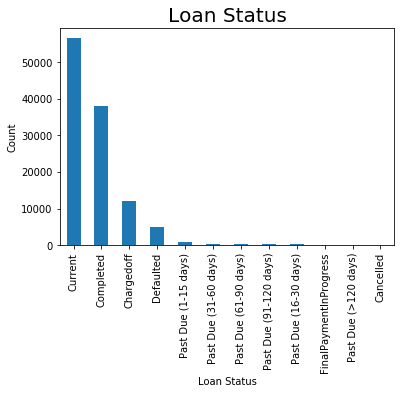

In [11]:

Loan_data['LoanStatus'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Loan Status', size=20)
plt.xlabel('Loan Status')
plt.plot();

Most of the loans are Current. Several are completed. Just some of them are charged off or defaulted

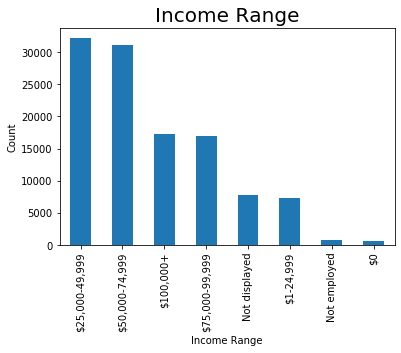

In [67]:

Loan_data['IncomeRange'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Income Range', size=20)
plt.xlabel('Income Range')
plt.plot();

The range (25,000 - 49,999) and (50,000 - 74,999) are the majority. There are some groups of people with income higher than 75,000 but just very small percentage of those with income less than 24,999. Those people with the income from 25,000 0 74,999 has the most transactions for Prosper Loan.

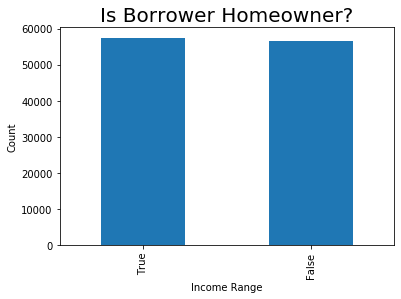

In [73]:
Loan_data['IsBorrowerHomeowner'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Is Borrower Homeowner?', size=20)
plt.xlabel('Income Range')
plt.plot();

It seems that having a house or not does not make a significant difference regarding taking loan

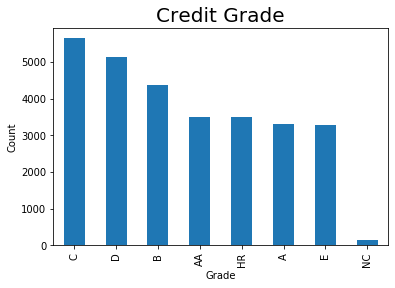

In [21]:
Loan_data['CreditGrade'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Credit Grade', size=20)
plt.xlabel('Grade')
plt.plot();

Most people have credit grade of C & D

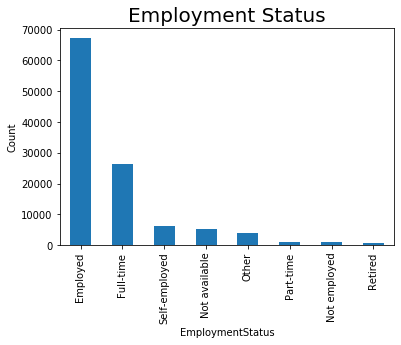

In [70]:
Loan_data['EmploymentStatus'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Employment Status', size=20)
plt.xlabel('EmploymentStatus')
plt.plot();

Almost of borrowing transactions are made by employed and full-time individual. 

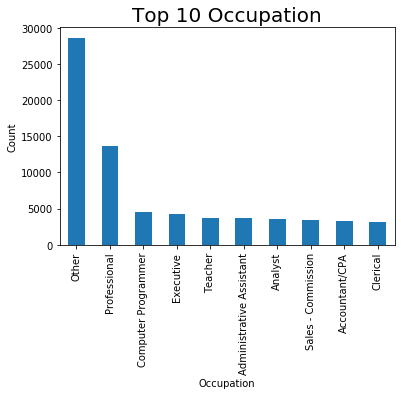

In [15]:
Loan_data['Occupation'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Top 10 Occupation', size=20)
plt.xlabel('Occupation')
plt.plot();

Top 3 occupations in this  Prosper Customer Dataset include: Other, Professional, Computer Progammer and Executive.

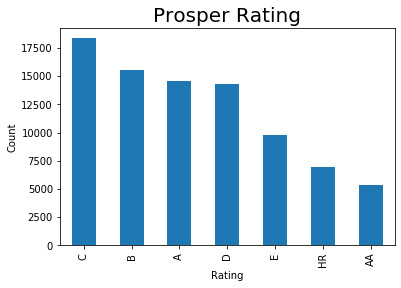

In [20]:

Loan_data['ProsperRating (Alpha)'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Prosper Rating', size=20)
plt.xlabel('Rating')
plt.plot();

C rating accounts for highest percentage. B rating ranks secondly. A & D come after that. Just few people get AA.

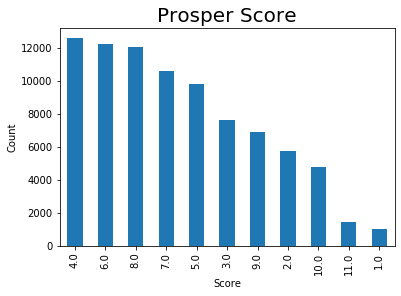

In [31]:
Loan_data['ProsperScore'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Prosper Score', size=20)
plt.xlabel('Score')
plt.plot();

Most customers have medium Prosper score from 5 to 8. Among them, score of 4 and 6 accounts for the highest percentage.

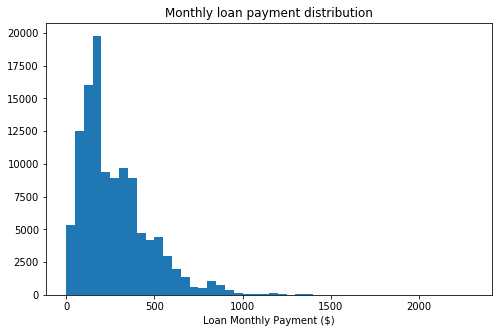

In [88]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, Loan_data['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.title('Monthly loan payment distribution')
plt.show()

People usually get scheduled monthly payment of around $200

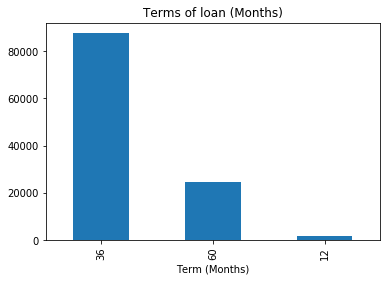

In [10]:
Loan_data['Term'].value_counts().plot(kind = 'bar')
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

People usually take loans with the term of 36 months

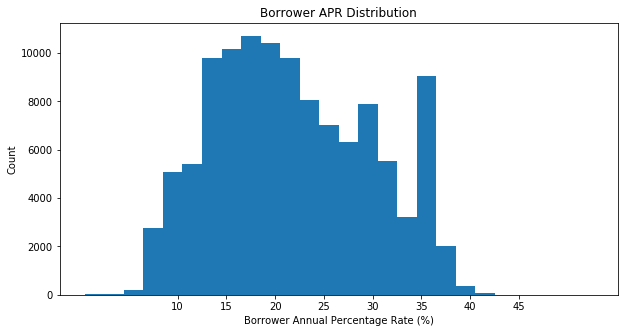

In [12]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = Loan_data['BorrowerAPR']*100
bins = np.arange(0.5, Loan_data['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plt.title('Borrower APR Distribution')
plt.show()

The borrower annual percentage rate is usually in the range of 15 - 20%. There are fewer loans with the rate out this range except the groups of loan with the rate of 35%

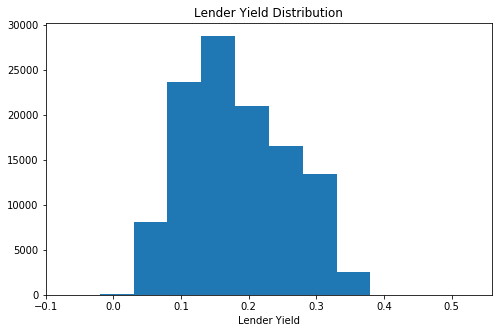

In [14]:
#Lender Yield Distribution
binsize = 0.05
bins = np.arange(-.07, Loan_data['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')

plt.show()

Most lender earn the yield from 0.1 - 0.2

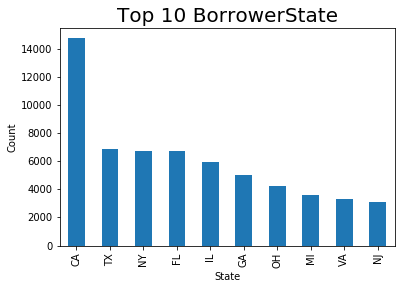

In [11]:

Loan_data['BorrowerState'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Top 10 BorrowerState', size=20)
plt.xlabel('State')
plt.plot();

Most borrwers are California residents.

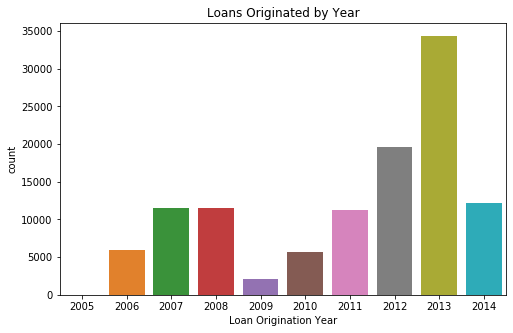

In [18]:
# Loan Origination by Year

plt.figure(figsize=[8, 5])
sns.countplot(data=Loan_data,x=pd.DatetimeIndex(Loan_data['LoanOriginationDate']).year)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

There was an extremely sharp decrease of loan amount in 2009 due to economic recession. After that, the amound increased rapidly and reached the peak in 2013.

# Bivariate Exploration

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


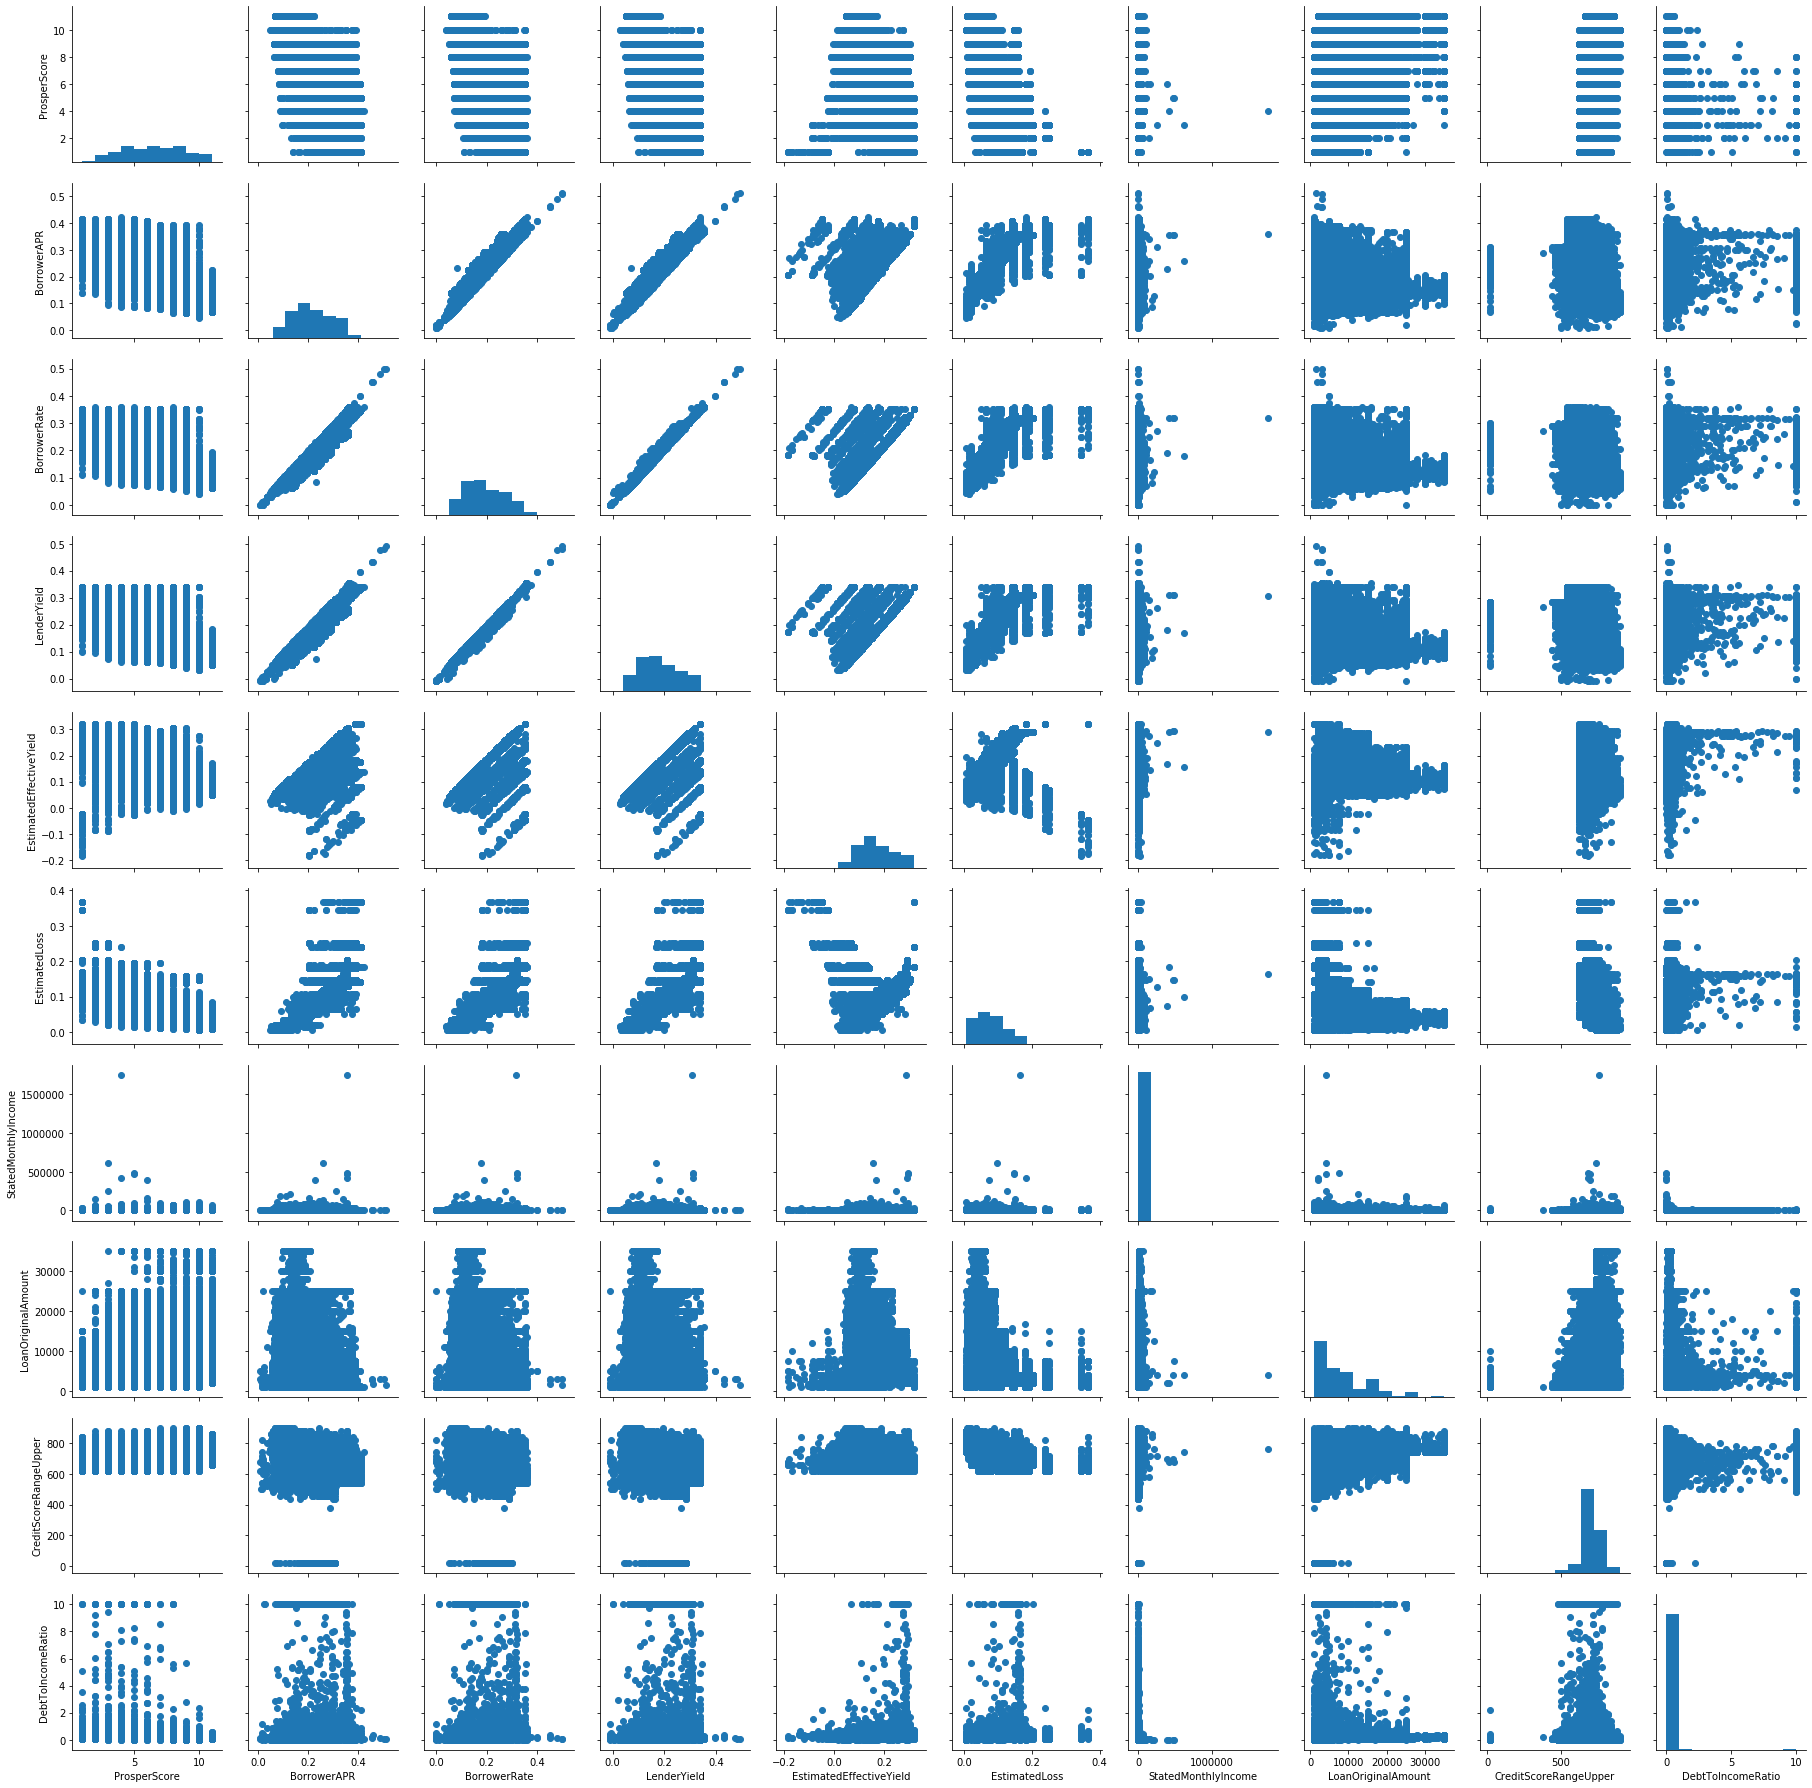

In [102]:
Loan_matrix = ['ProsperScore', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss','StatedMonthlyIncome', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'DebtToIncomeRatio']
g = sns.PairGrid(data = Loan_data, vars = Loan_matrix);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

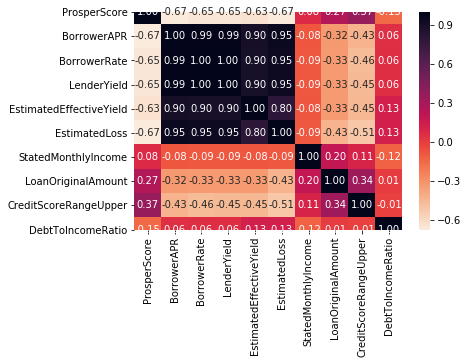

In [103]:
sns.heatmap(Loan_data[Loan_matrix].corr(),annot=True,
            cmap="rocket_r", fmt = '.2f')

- BorrowerAPR and LenderYield: Strong positive relationship means the higher the rate the higher the lender earns.
- ProsperScore has negative relationship with BorrowerAPR, LenderYield, Estimated Effective Yield and Loss. This show that lower score means higher risks and hence higher interest rates, higher the lender earns and higher risk of loss.
- LoanOriginalAmount has the strongest relationship with Estimated Loss. This relationship is negative. It means that the the bigger the amount of original loan is, the lower the loss is estimated. LoanOriginalAmount also has negative relationship with Borrower APR and Borrower Rate. We may expect that the bigger the loan amount will have less the interest rate.
- Credit Score has positive relationship with Prosper Score but do have negative ones with Borrower Rate, Lender Yield and Estimated Loss.

[]

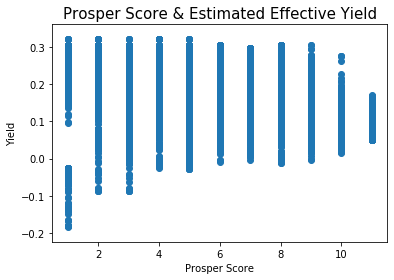

In [25]:
plt.scatter(data = Loan_data, x = 'ProsperScore', y = 'EstimatedEffectiveYield')
plt.ylabel('Yield')
plt.title('Prosper Score & Estimated Effective Yield', size=15)
plt.xlabel('Prosper Score')
plt.plot()

<Figure size 1800x1080 with 0 Axes>

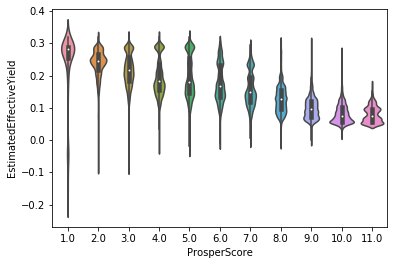

<Figure size 1800x1080 with 0 Axes>

In [29]:
sns.violinplot(data = Loan_data, x = 'ProsperScore', y = 'EstimatedEffectiveYield')
plt.figure(figsize=(25,15))

The chart shows that the higher prosper score is, the lower the effective yield is. Transactions with low score tends to earn higher estimated effiective yield than those with high score.

<Figure size 1800x1080 with 0 Axes>

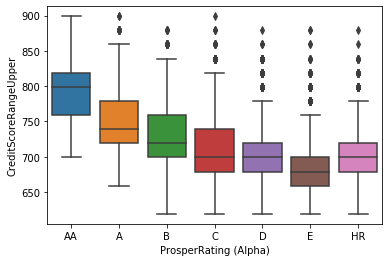

<Figure size 1800x1080 with 0 Axes>

In [85]:
sns.boxplot(data = Loan_data, y = 'CreditScoreRangeUpper', x = 'ProsperRating (Alpha)', order = ['AA','A', 'B', 'C','D','E','HR'])
plt.figure(figsize=(25,15))

Prosper Rating tends to have positive relationship with Credit Score. Higher credit score will lead to better Prosper rating and vice versa.

In [ ]:
sns.boxplot(data = Loan_data, x = 'ProsperScore', y = 'EstimatedEffectiveYield')
plt.figure(figsize=(25,15))

In [55]:
Loan_data['LoanOriginationYear'] = pd.DatetimeIndex(Loan_data['LoanOriginationDate']).year
Loan_data['LoanOriginationYear']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: LoanOriginationYear, Length: 113937, dtype: int64

<Figure size 1800x1080 with 0 Axes>

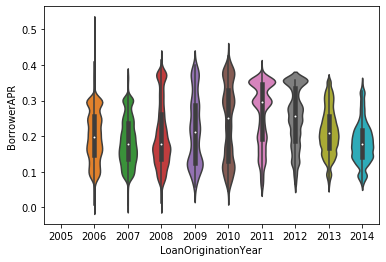

<Figure size 1800x1080 with 0 Axes>

In [56]:
sns.violinplot(data = Loan_data, y = 'BorrowerAPR', x = 'LoanOriginationYear')
plt.figure(figsize=(25,15))

The chart shows that before economy recession (2006, 2007), there is a normal distribution of Borrower APR from. However, during the recession (2008, 2009), there were more loans with low rate than those with high rate. When the economy started recovering (2010, 2011), there were more loans with higher Borrower APR.

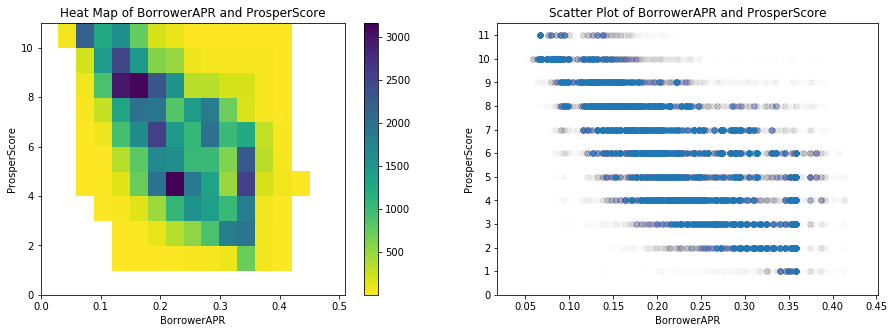

In [4]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, Loan_data['BorrowerAPR'].max()+0.02, 0.03)
bins_y = np.arange(0, Loan_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = Loan_data, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = Loan_data, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

After creating bins for Borrowe APR and Prsosper Score, we can see that a lower ProsperScore leads to higher borrower rate and vice versa. This makes senses as lower prosper score means higher risks leading to higher rates.

In [8]:
#check value staed monthly income
Loan_data['StatedMonthlyIncome'].value_counts().sort_values(ascending=False)

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
               ... 
4809.750000       1
8299.833333       1
4163.416667       1
1297.416667       1
8609.750000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

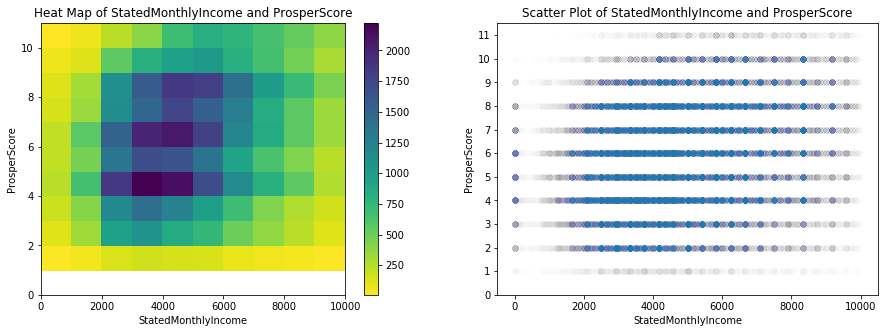

In [59]:
# Checking the relation between ProsperScore and StatedMonthlyIncome

df_wo_outlier=Loan_data[Loan_data['StatedMonthlyIncome'] < 10000]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_wo_outlier['StatedMonthlyIncome'].max()+1000, 1000)
bins_y = np.arange(0, df_wo_outlier['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_wo_outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = df_wo_outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

ProsperScore is positively related to the stated monthly income. Higher Stated Montly Income tends to have higher Prosper Score.
In addition, there are most loans with monthly income around 4000 - 6000 and Prosper score around 4 - 8.

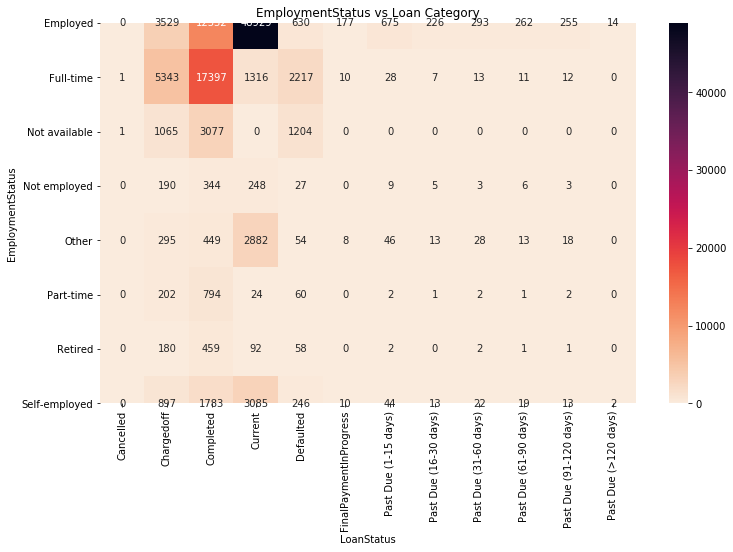

In [10]:
cat_counts = Loan_data.groupby(['EmploymentStatus', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 7])
sns.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('EmploymentStatus vs Loan Category');

As we knew earlier, most borrowing transactions are made by employed and full-time individual. Most of the loans are current, some are completed. Just a few of them are charged off or defaulted.
Gathering two variables as a heatmap, we can see that current loans which are taken by employed people are the dominant percentage of the total loans. Another big cluster of taking loans are those working full time had completed loan (17397 transactions).

In [17]:
#Rename columns
Loan_data = Loan_data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [18]:
#Replace listing category number by name
cat_num_name = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

Loan_data['ListingCategory'] = Loan_data['ListingCategory'].map(cat_num_name)

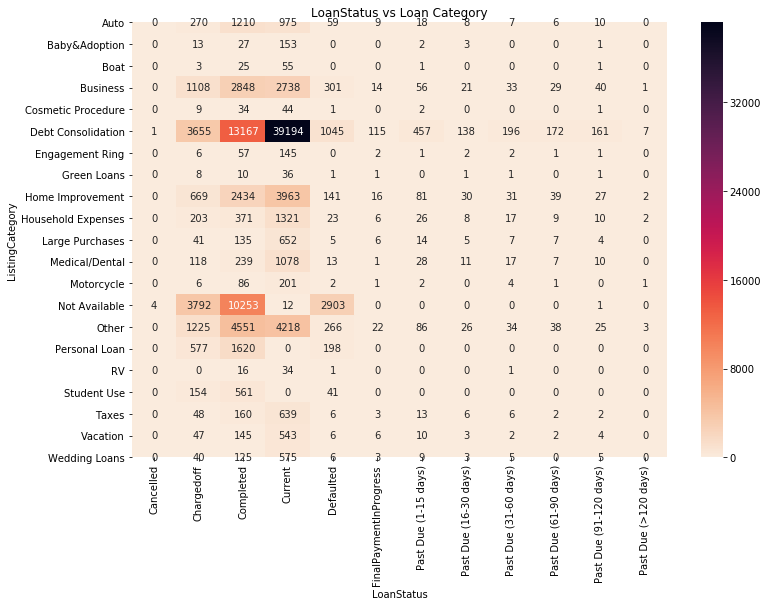

In [20]:
cat_counts = Loan_data.groupby(['ListingCategory', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'ListingCategory', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 8])
sns.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('LoanStatus vs Loan Category');

Regarding Listing Category, debt consolidation are the one have most loans. Most current loans are in debt consolidation. Most completed loans are also in deb consolidation.

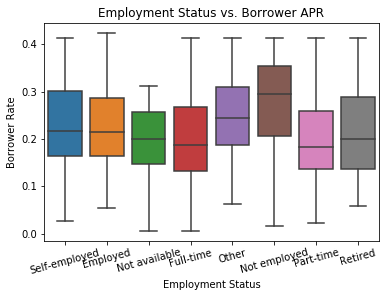

In [95]:
sns.boxplot(data = Loan_data, y = 'BorrowerAPR', 
            x = 'EmploymentStatus');

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status vs. Borrower APR');
plt.xticks(rotation = 15);

Borrower APR was highest in not employed group.

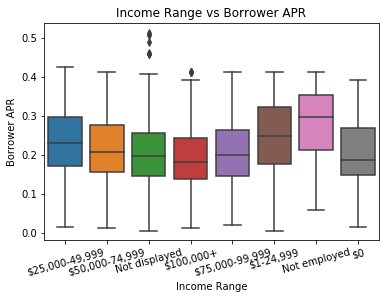

In [97]:
sns.boxplot(data = Loan_data, y = 'BorrowerAPR', 
            x = 'IncomeRange');

plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.title('Income Range vs Borrower APR');
plt.xticks(rotation = 15);

Borrower APR was likely to be higher in low income or not employed group

# Multivariate Exploration

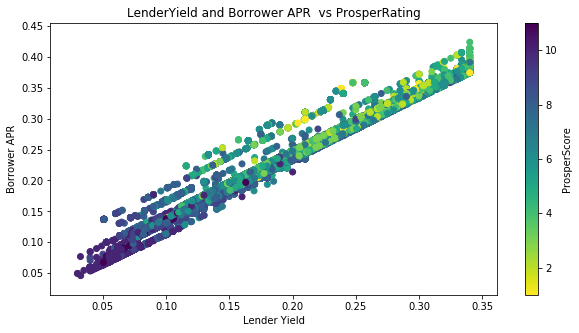

In [101]:
plt.figure(figsize = [10, 5])
plt.scatter(data=Loan_data,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield and Borrower APR  vs ProsperRating');

Above is the relationship betweem Borrower APR, Lender Yield and Prosper Rating. Strong positive relationship betweem BorrowerAPR and LenderYield means the higher the rate the higher the lender earns. We also see that most loans with lower BorrowerAPR & LenderYield have higher ProsperScore and visa-versa.

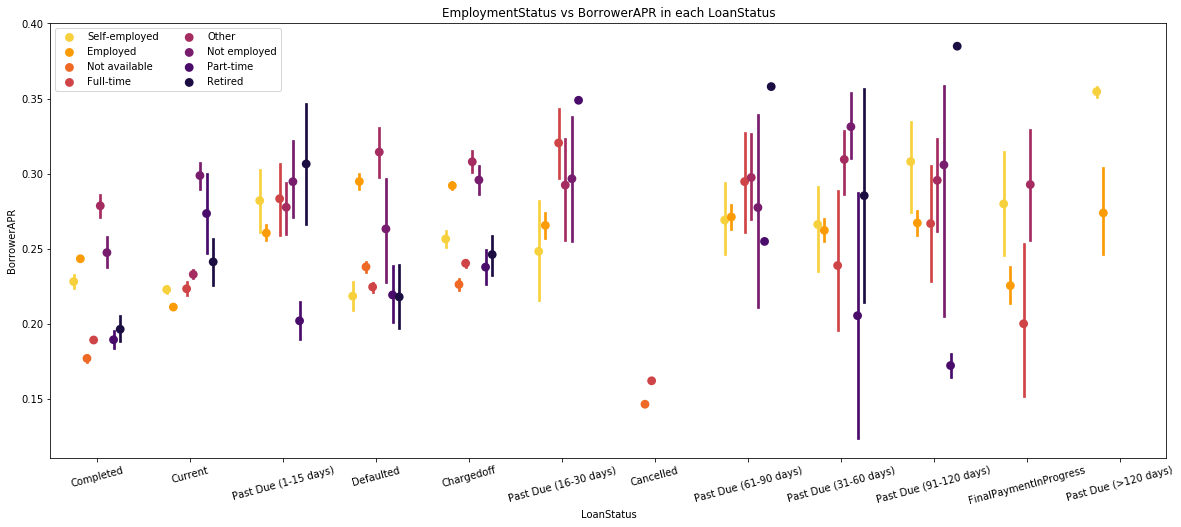

In [93]:
fig = plt.figure(figsize = [20,8])
ax = sns.pointplot(data = Loan_data, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();


Past Due loans generally have higher interest rates in all employment statuses. Part time, Retired or Not employ tend to have higher rate than those with full-time job or being employed.

plt.figure(figsize = [10, 5])
plt.scatter(data=Loan_data,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield and Borrower APR  vs ProsperRating');

Above is the relationship betweem Borrower APR, Lender Yield and Prosper Rating. Strong positive relationship betweem BorrowerAPR and LenderYield means the higher the rate the higher the lender earns. We also see that most of loans with lower BorrowerAPR & LenderYield have higher ProsperScore and visa-versa.

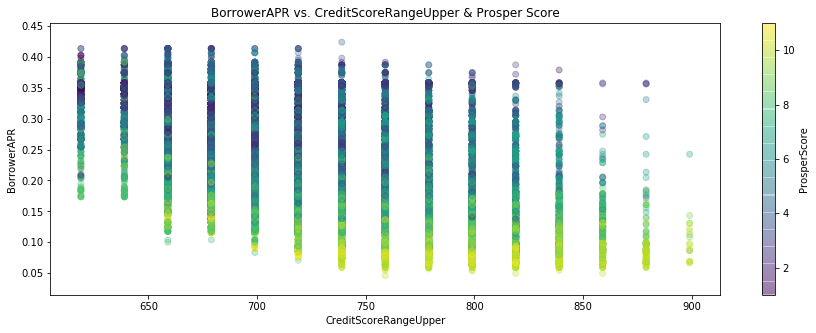

In [73]:
# BorrowerAPR vs. CreditScoreRangeUpper & Prosper Score
plt.figure(figsize = [15, 5]) 
plt.scatter(data = Loan_data, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & Prosper Score')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

The chart demonstrates clearly a strong positive relationship between Credit Score and Prosper Score. Also, either of them has strong negative relationship with Borrowe APR. Low credit score and prosper score will lead to higher borrower APR

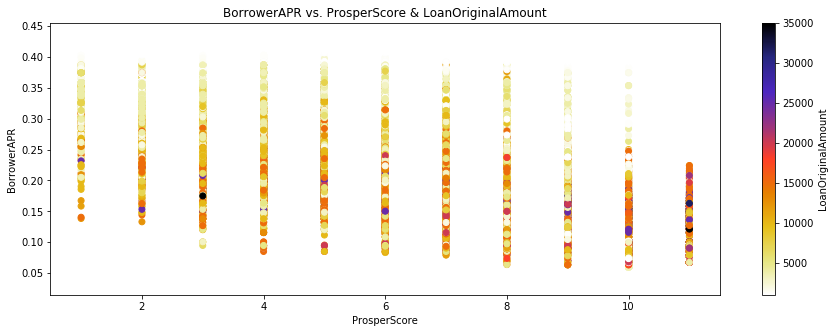

In [92]:
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = Loan_data,\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

The chart shows us that Loan Original Amount has positive relationship with Prosper Score but both of them have negative relationship with Borrower APR. Higher prosper score will get lower borrower APR. Also, most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

In [98]:
def hist2dgrid(x, y, **kwargs):
   
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


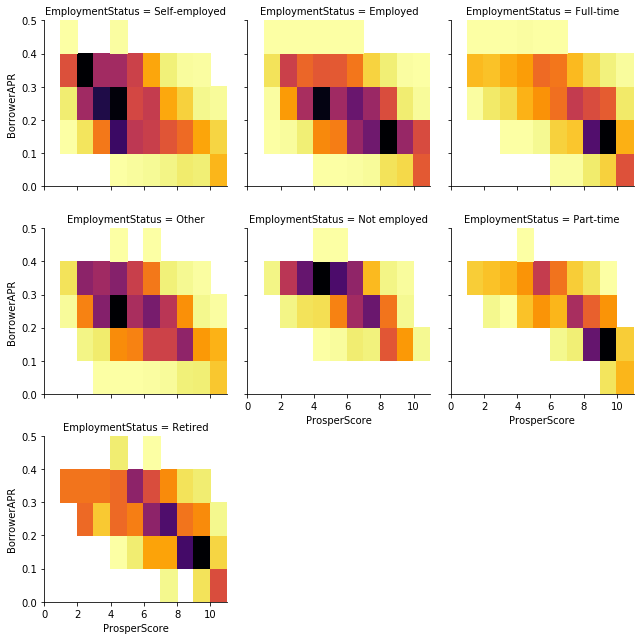

In [100]:
# create faceted heat maps on the EmploymentStatus
g = sns.FacetGrid(data = Loan_data[Loan_data['EmploymentStatus'] != 'Not available'],\
                 col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');

According to charts above, there is a likelihood that:
- Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
- Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
- Retired people have higher ProsperScore and lower BorrowerAPR
- Employed people are diverse regarding the ProsperScore and BorrowerAPR

# III. Summary

Regarding Prosper Score & Rating:
- ProsperScore has negative relationship with BorrowerAPR, LenderYield, Estimated Effective Yield and Loss. This show that lower score means higher risks and hence higher interest rates, higher the lender earns and higher risk of loss.
- Prosper Rating tends to have positive relationship with Credit Score. Higher credit score will lead to better Prosper rating and vice versa.
- Most loans with lower BorrowerAPR & LenderYield have higher ProsperScore and visa-versa.

Regarding Loan Orginal AmounT and Borrower APR:

- Loan Original Amount has positive relationship with Prosper Score but both of them have negative relationship with Borrower APR. Higher prosper score will get lower borrower APR. Also, most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)


Regarding employment status, prosper score and borrower APR:
- Most borrowing transactions are made by employed and full-time individual
- Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
- Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
- Retired people have higher ProsperScore and lower BorrowerAPR
- Employed people are diverse regarding the ProsperScore and BorrowerAPR

Regarding loan status:
- Most of the loans are current, some are completed. Just a few of them are charged off or defaulted. Gathering two variables as a heatmap, we can see that current loans which are taken by employed people are the dominant percentage of the total loans. Another big cluster of taking loans are those working full time had completed loan (17397 transactions).

- Past Due loans generally have higher interest rates in all employment statuses. Part time, Retired or Not employ tend to have higher rate than those with full-time job or being employed.
- Regarding Listing Category, debt consolidation are the one have most loans. Most current loans are in debt consolidation. Most completed loans are also in deb consolidation.


Regarding Income Range, borrower APR was likely to be higher in low income or not employed group.